In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
dados = pd.read_csv('demo01.csv')

In [3]:
dados.info()# relação do tipo de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

In [4]:
plt.figure(figsize=[25,25])

<Figure size 1800x1800 with 0 Axes>

<Figure size 1800x1800 with 0 Axes>

<AxesSubplot:xlabel='mau', ylabel='count'>

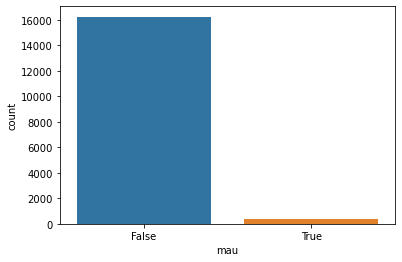

In [5]:
sns.countplot(x = dados['mau'])

In [6]:
dados['mau'].value_counts()

False    16260
True       390
Name: mau, dtype: int64

In [7]:
print('\n Taxa de maus pagadores')
print(round(390/(16260+390),3))


 Taxa de maus pagadores
0.023


In [8]:
pd.crosstab(index=dados['idade'], columns=dados['mau'])

mau,False,True
idade,,
22.030137,1,0
22.071233,1,0
22.221918,1,0
22.416438,1,0
22.569863,2,0
...,...,...
68.345205,2,0
68.410959,1,0
68.520548,1,0


In [9]:
pd.crosstab(index=dados['posse_de_imovel'], columns=dados['mau'])

mau,False,True
posse_de_imovel,,
N,5314,160
Y,10946,230


In [10]:
pd.crosstab(index=dados['posse_de_veiculo'], columns=dados['mau'])

mau,False,True
posse_de_veiculo,,
N,9931,247
Y,6329,143


In [11]:
pd.crosstab(index=dados['educacao'], columns=dados['mau'])

mau,False,True
educacao,,
Academic degree,17,0
Higher education,4436,115
Incomplete higher,624,25
Lower secondary,181,7
Secondary / secondary special,11002,243


In [12]:
# após algumas verificações, não foi possível identificar um valor mas relevante que outro

In [13]:
"""proxima etapa é o tratamento dos dados da tabela, eliminando dados faltantes ou duplicados e
transformação das variaveis bool e str para float ou int"""

'proxima etapa é o tratamento dos dados da tabela, eliminando dados faltantes ou duplicados e\ntransformação das variaveis bool e str para float ou int'

In [14]:
dados.shape

(16650, 16)

In [15]:
dados = dados.drop_duplicates()

In [16]:
dados.shape

(6770, 16)

In [17]:
dados.reset_index(inplace=True)

In [18]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  6770 non-null   int64  
 1   sexo                   6770 non-null   object 
 2   posse_de_veiculo       6770 non-null   object 
 3   posse_de_imovel        6770 non-null   object 
 4   qtd_filhos             6770 non-null   int64  
 5   tipo_renda             6770 non-null   object 
 6   educacao               6770 non-null   object 
 7   estado_civil           6770 non-null   object 
 8   tipo_residencia        6770 non-null   object 
 9   idade                  6770 non-null   float64
 10  tempo_emprego          6770 non-null   float64
 11  possui_celular         6770 non-null   int64  
 12  possui_fone_comercial  6770 non-null   int64  
 13  possui_fone            6770 non-null   int64  
 14  possui_email           6770 non-null   int64  
 15  qt_p

In [19]:
dados.isna().sum()

index                    0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

In [20]:
#não possui dados faltantes, proximo passo é a conversão de várias para float e int.
#Eliminação de dados categorizados
# dados a serem alterados : sexo, imovel, veiculo, renda, educação,estado_civil, residencia, mau

In [21]:
dados.sexo.unique()

array(['M', 'F'], dtype=object)

In [22]:
dados['sexo'] = dados['sexo'].map({'M': 1, 'F':0}) 
dados.sexo.unique()

array([1, 0])

In [23]:
dados.posse_de_imovel.unique()

array(['Y', 'N'], dtype=object)

In [24]:
dados.posse_de_veiculo.unique()

array(['Y', 'N'], dtype=object)

In [25]:
dados['posse_de_imovel'] = dados['posse_de_imovel'].map({'Y':1, 'N':0})    
dados['posse_de_veiculo'] = dados['posse_de_veiculo'].map({'Y':1,'N':0})
dados['mau'] = dados['mau'].map({True : 1 , False : 0}) # mau pagador = 1 , bom pagador = 0

In [26]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  6770 non-null   int64  
 1   sexo                   6770 non-null   int64  
 2   posse_de_veiculo       6770 non-null   int64  
 3   posse_de_imovel        6770 non-null   int64  
 4   qtd_filhos             6770 non-null   int64  
 5   tipo_renda             6770 non-null   object 
 6   educacao               6770 non-null   object 
 7   estado_civil           6770 non-null   object 
 8   tipo_residencia        6770 non-null   object 
 9   idade                  6770 non-null   float64
 10  tempo_emprego          6770 non-null   float64
 11  possui_celular         6770 non-null   int64  
 12  possui_fone_comercial  6770 non-null   int64  
 13  possui_fone            6770 non-null   int64  
 14  possui_email           6770 non-null   int64  
 15  qt_p

In [27]:
dados = pd.get_dummies(dados, columns=['tipo_renda','educacao','estado_civil', 'tipo_residencia'], drop_first=True)

In [28]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   index                                   6770 non-null   int64  
 1   sexo                                    6770 non-null   int64  
 2   posse_de_veiculo                        6770 non-null   int64  
 3   posse_de_imovel                         6770 non-null   int64  
 4   qtd_filhos                              6770 non-null   int64  
 5   idade                                   6770 non-null   float64
 6   tempo_emprego                           6770 non-null   float64
 7   possui_celular                          6770 non-null   int64  
 8   possui_fone_comercial                   6770 non-null   int64  
 9   possui_fone                             6770 non-null   int64  
 10  possui_email                            6770 non-null   int6

In [29]:
dados.isna().sum()

index                                     0
sexo                                      0
posse_de_veiculo                          0
posse_de_imovel                           0
qtd_filhos                                0
idade                                     0
tempo_emprego                             0
possui_celular                            0
possui_fone_comercial                     0
possui_fone                               0
possui_email                              0
qt_pessoas_residencia                     0
mau                                       0
tipo_renda_Pensioner                      0
tipo_renda_State servant                  0
tipo_renda_Student                        0
tipo_renda_Working                        0
educacao_Higher education                 0
educacao_Incomplete higher                0
educacao_Lower secondary                  0
educacao_Secondary / secondary special    0
estado_civil_Married                      0
estado_civil_Separated          

In [30]:
# dados tratados 
# definindo a váriavel que será alvo de análise e separando-a

In [31]:
x = dados.drop('mau', axis =1)

In [32]:
y = dados['mau']

In [33]:
# base de treinamento e teste 70/30

In [34]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=0.3, random_state=100)

In [41]:
clf = DecisionTreeClassifier(random_state=100) #classificação

In [42]:
clf.fit(x_tr,y_tr)

DecisionTreeClassifier(random_state=100)

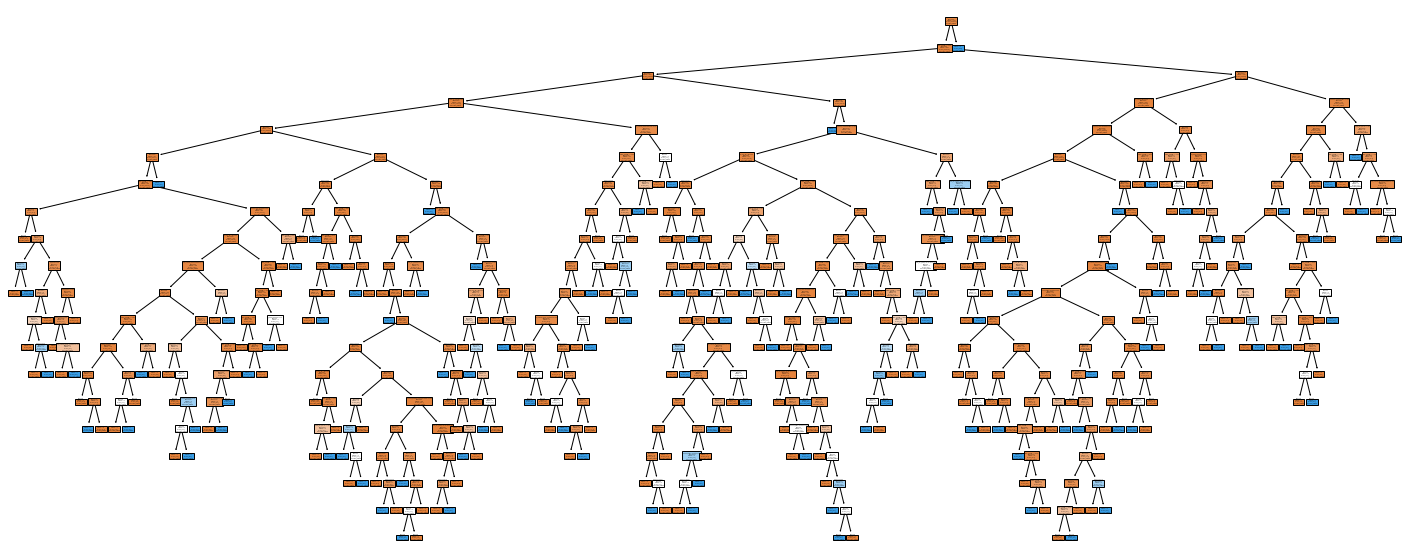

In [43]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['mau_pagador', 'bom_pagador'],
          feature_names=x.columns);

In [44]:
# arvore muito grande, necessário adicionar parâmetros para reduzi-la e dimunuir a possbilidade de overfitting

In [45]:
clf_mod = DecisionTreeClassifier(random_state=100, max_depth=5, min_samples_leaf=5,n_estimators ) #classificação

In [46]:
clf_mod.fit(x_tr,y_tr)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=100)

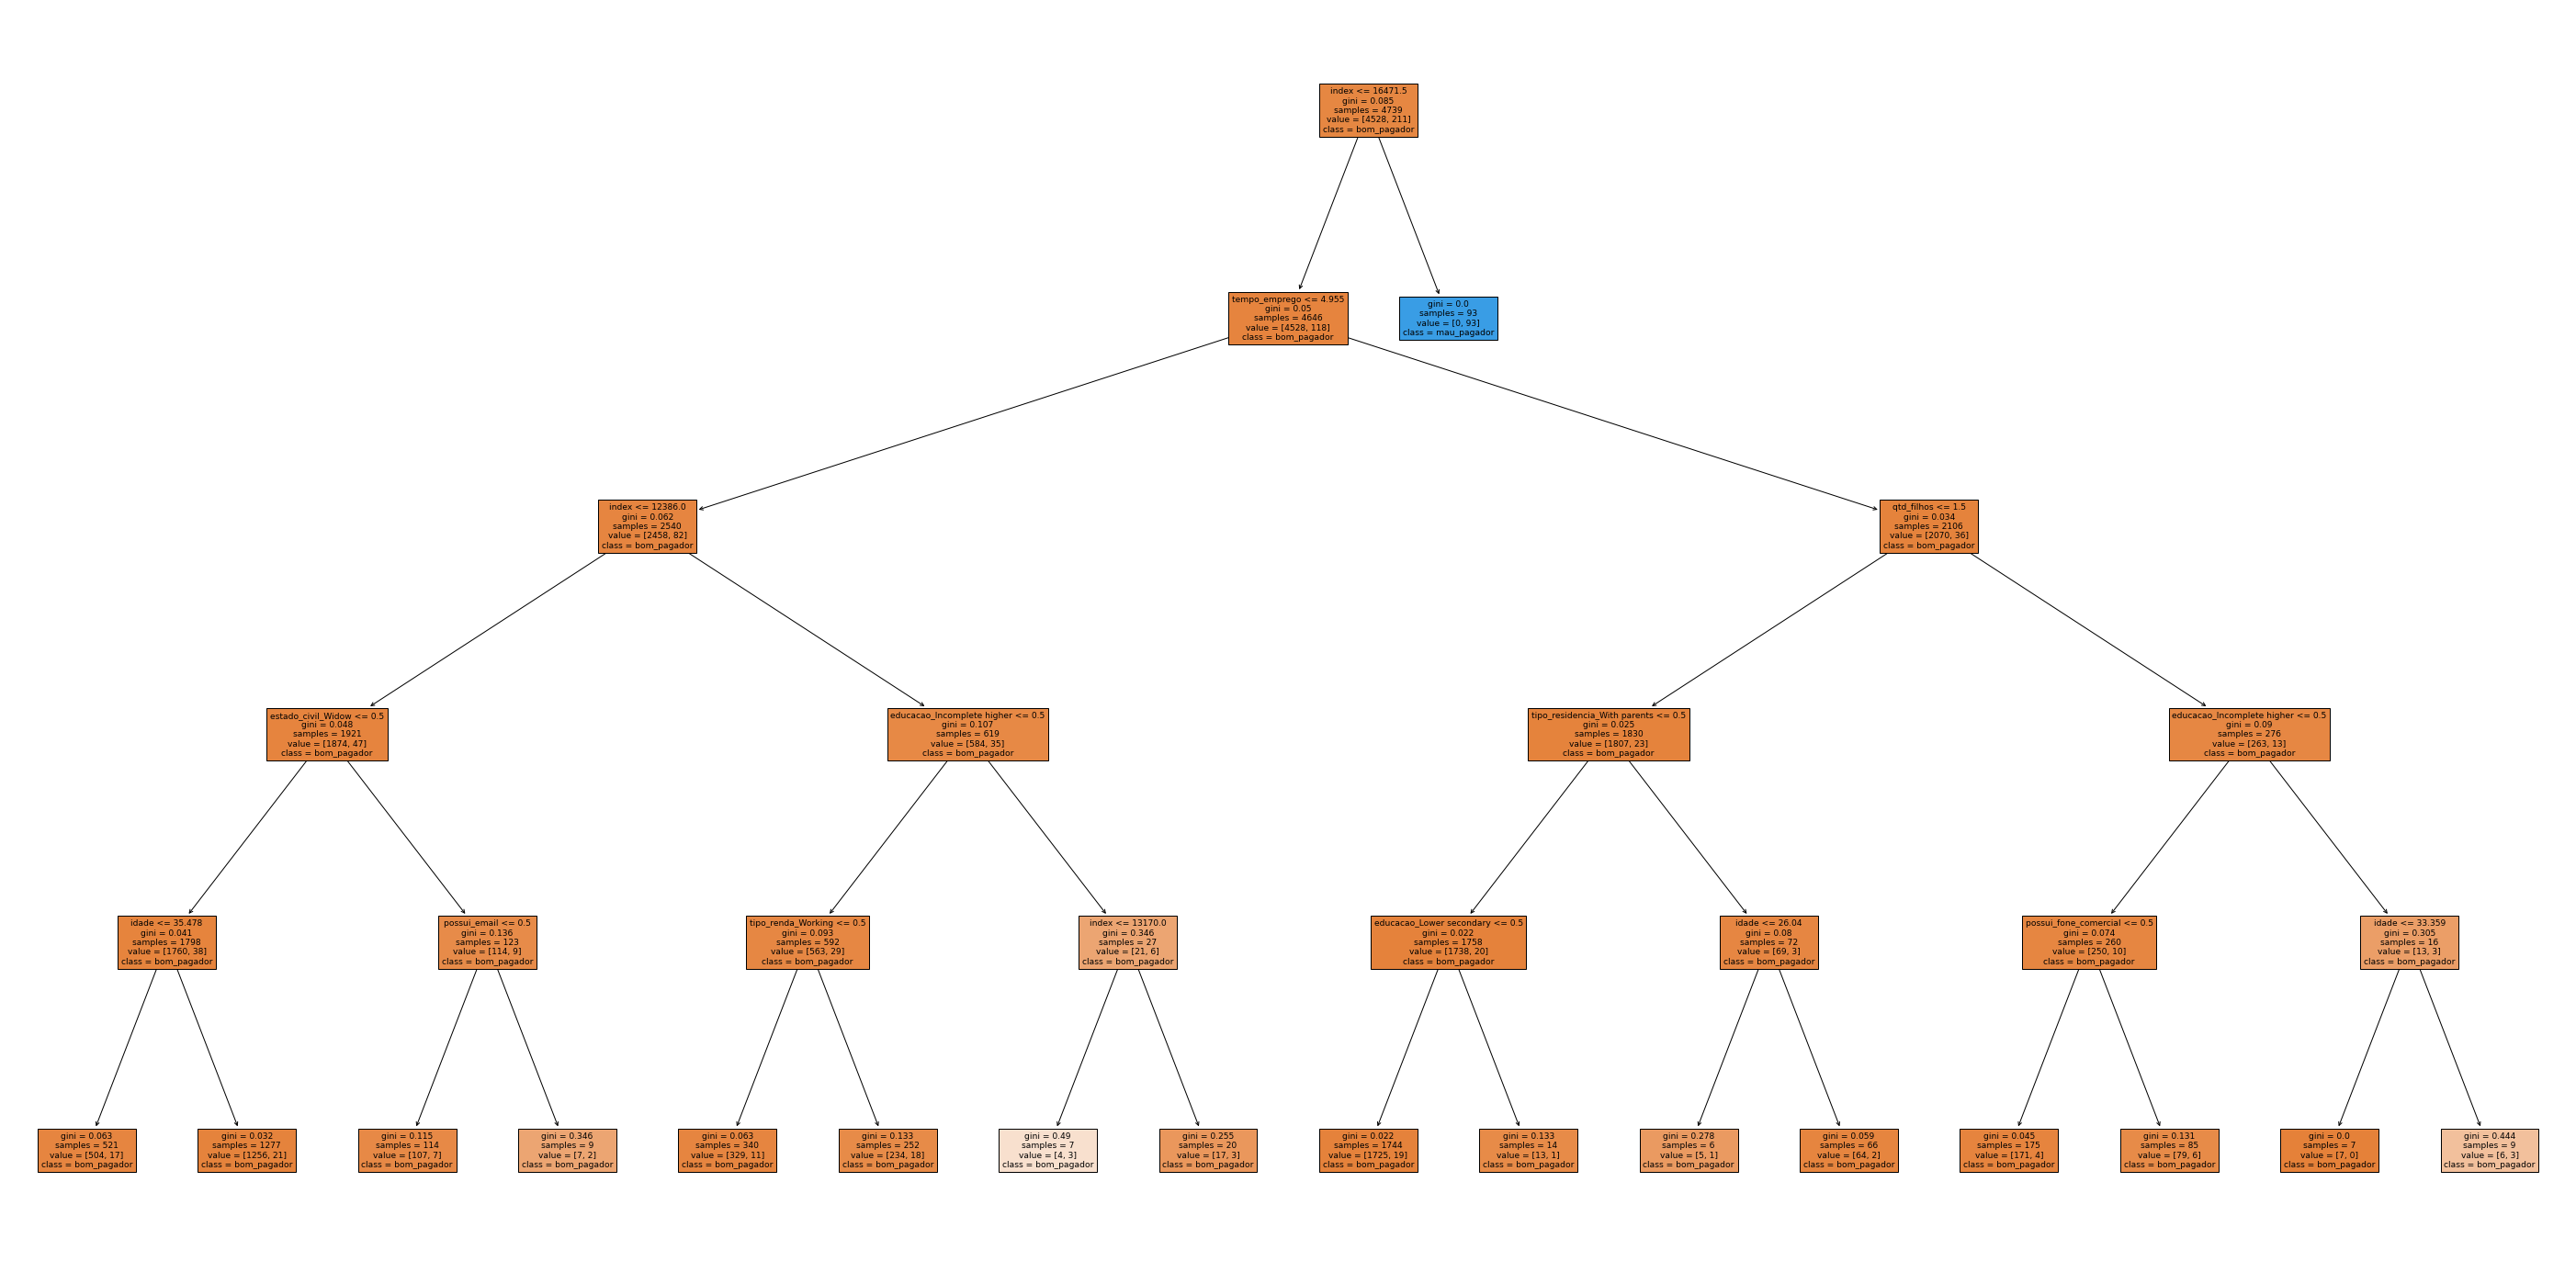

In [50]:
plt.figure(figsize=(50, 25))
plot_tree(clf_mod,
          filled=True,
          class_names=['bom_pagador', 'mau_pagador'],
          feature_names=x.columns);

In [54]:
y_tr.value_counts()

0    4528
1     211
Name: mau, dtype: int64

In [55]:
y_pred = clf_mod.predict(x_tr)

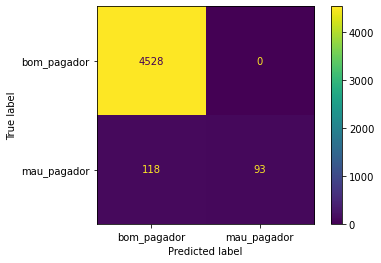

In [58]:
plot_confusion_matrix(clf_mod, x_tr, y_tr, display_labels=['bom_pagador','mau_pagador'])

In [60]:
accuracy_score(y_tr,y_pred)

0.9751002321164802

In [62]:
y_pred_t = clf_mod.predict(x_te)


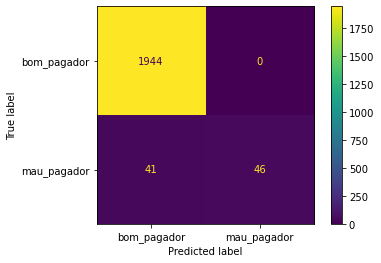

In [63]:
plot_confusion_matrix(clf_mod, x_te,y_te, display_labels=['bom_pagador','mau_pagador'])

In [64]:
accuracy_score(y_te,y_pred_t)

0.9798129000492368

In [65]:
# verificamos que o modelo de teste, possui a acuracia bem alta , parecida com a de treino.

In [67]:
# com isso, existe a possibilidade de overfitting, porem o modelo de teste respondeu bem, dando aproximadamente
#98% de acurácia